# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are more than free to change how it looks or create one from scratch.

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaning the data
    - Tidy up the column names, make sure there is no spaces
    - Observe,comment on and handle inconsistent data.(i.e duplicates, irrelevant data,incorrect data,etc)
    - Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR).
    - Handle missing data
    - Observe and comment on outliers
    - Handle outliers
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
    - Add 2 new columns named 'Week number' and 'Date range' and discretize the data into weeks according to the dates. 
        - Tip: Change the datatype of the date feature to datetime type instead of object.
    - Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
    - If exists , Identify feature(s) which need normalization and show your reasoning. Then choose a technique to normalize the feature(s) and comment on why you chose this technique.
- Additional data extraction
    - Add GPS coordinates for the cities/locations.
    - For this task you can extract the GPS coordinates from an API or web scraping and integrate into your csv file as new features. 
    - Tip 1 - you can find the web scraping and data integration notebooks under 'additional resources'  on the CMS useful.
    - Tip 2 - If you are going to use an API make sure you do not make request for each existing row but rather group by the cities and get their respective coordinates. Making a request for each row is too inefficient and expensive.
    - Tip 3 - Rather than running the code for calling the API each time you load the notebook, the first time you call the API save the results in a csv file and then you could you check if a csv file exists for the GPS coordinates, if so, load directly and don't call APi. Same applies for web scraping.

- Lookup table and load back into new csv file
    - Create a lookup table
    - Load the new dataset into a new csv file named `green_trip_data_{year}-{month}clean.csv`. replace year and month with the appropriate values.
    - Load the lookup table to a csv file called `lookup_table_green_taxis.csv` 
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [30]:
import pandas as pd

# Define the file path
file_path = 'C:/GUC/Semester 9/Data Engineering/Project/Milestone 1/green_tripdata_2019-01.csv'

# Load the dataset into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to check its structure
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672116 entries, 0 to 672115
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Vendor                 672116 non-null  object 
 1   lpep pickup datetime   672116 non-null  object 
 2   lpep dropoff datetime  672116 non-null  object 
 3   store and fwd flag     630537 non-null  object 
 4   Rate type              672116 non-null  object 
 5   PU Location            672116 non-null  object 
 6   DO Location            672116 non-null  object 
 7   passenger count        629075 non-null  float64
 8   trip distance          672116 non-null  float64
 9   fare amount            672116 non-null  float64
 10  extra                  303954 non-null  float64
 11  mta tax                672116 non-null  float64
 12  tip amount             672116 non-null  float64
 13  tolls amount           672116 non-null  float64
 14  ehail fee              339 non-null 

# 2- EDA

### (1) What do 'N' represent in the store and Fwd Flag?

In [2]:


# Extracting unique values from the 'store and fwd flag' column
unique_values = data['store and fwd flag'].unique()

# Display the unique values
print(unique_values)

['N' 'Y' nan]


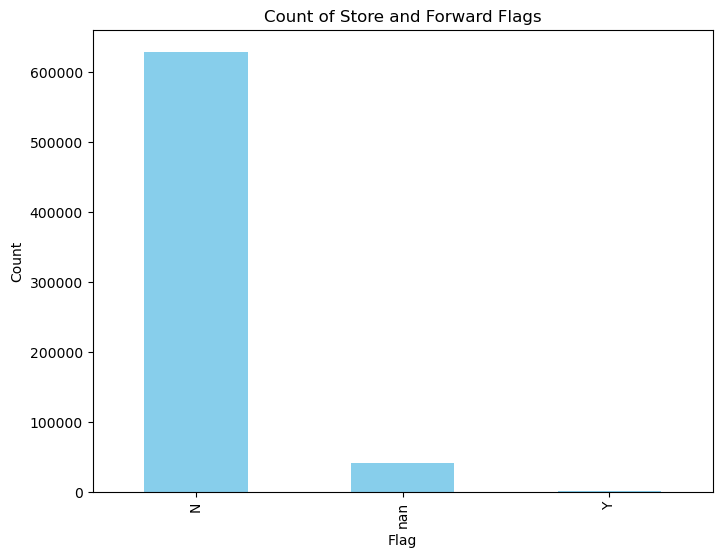

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Counting occurrences of each value in 'store and fwd flag' column
value_counts = data['store and fwd flag'].value_counts(dropna=False)

# Plotting the count of 'store and fwd flag' values using Pandas
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Store and Forward Flags')
plt.xlabel('Flag')
plt.ylabel('Count')
plt.show()


So after checking the unique values of the column Store and Fwd Flag we found that there are only 3 unique values: 'N', 'Y', nan

we then plotted a figure to check the distribution of the 3 values and we found that 

N' (Around 600,000 occurrences): This signifies a large majority of cases where the data was not stored and forwarded by the vehicles, possibly indicating a regular transmission of data without relying on local storage.

NaN (Around 50,000 occurrences): The presence of a substantial number of missing values in this column is noteworthy. These missing values ('NaN') need to be handled, whether through imputation or considering their impact on the analysis.

'Y' (Very few occurrences): The small count of instances labeled as 'Y' implies that only a few instances saw the data being stored and forwarded by the vehicles, possibly due to a lack of connectivity or other reasons.

### (1) why are most of congestion surcharge values are missing?


In [7]:
unique_values_congestion_surcharge = data['congestion surcharge'].unique()

# Display the unique values
print(unique_values_congestion_surcharge)

[ nan 0.   2.75]


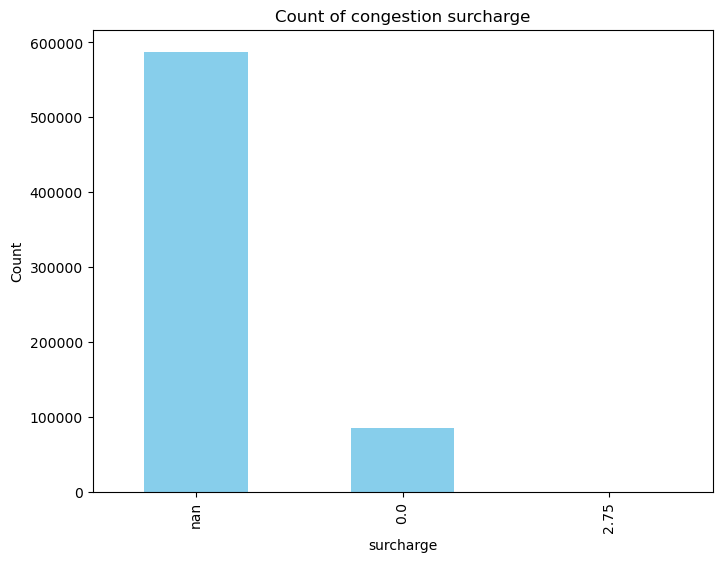

In [15]:
# Counting occurrences of each value in 'store and fwd flag' column
value_counts = data['congestion surcharge'].value_counts(dropna=False)

# Plotting the count of 'store and fwd flag' values using Pandas
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Count of congestion surcharge')
plt.xlabel('surcharge')
plt.ylabel('Count')
plt.show()

In [14]:
congestion_surcharge_counts = data['congestion surcharge'].value_counts()
print(congestion_surcharge_counts)

congestion surcharge
0.00    84531
2.75        1
Name: count, dtype: int64


After counting unique values and plotting them of the column congestion surcharge we found that
NaN (Approximately 600,000 occurrences): The large count of missing values ('NaN') indicates that data for the congestion surcharge is missing or not recorded for around 600,000 instances in the dataset.

0 (Approximately 100,000 occurrences): This signifies that the congestion surcharge was applied but was valued at $0 for approximately 100,000 instances, suggesting that for these trips, no specific congestion surcharge was imposed.

2.75 (One occurrence): There is only one recorded instance where the congestion surcharge was applicable at the rate of $2.75.

the slow adoption or understanding of the surcharge regulation could indeed be a plausible reason for the limited instances of surcharge application or the prevalence of missing or zero values in the dataset.

When a new regulation, such as the introduction of the congestion surcharge on January 1st, 2019, is implemented, it often takes time for drivers and the transportation ecosystem to adapt. Here are a few reasons why this might be reflected in the dataset:

Awareness and Implementation Period: It's possible that drivers might not have been fully aware of the new regulation initially or might have taken some time to understand its application. Therefore, the implementation of the surcharge might not have been immediate for all trips during the initial phase.

Technical Implementation: The technical implementation of new regulations in taxi metering systems or the administrative process might have experienced delays or complications, affecting the immediate application of the surcharge.

Regulatory or Operational Adjustments: Taxi drivers, cab companies, or the authorities might have taken some time to adjust to the new regulation, leading to delayed or partial implementation.

### (3) why are most of enhail fee values are missing?

Unique values in 'ehail fee': [ nan 0.   1.95]


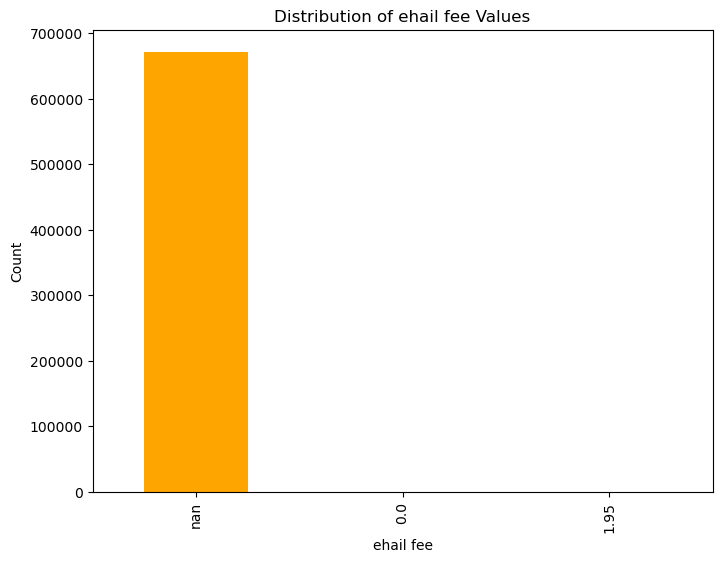

ehail fee
NaN     671777
0.00       335
1.95         4
Name: count, dtype: int64


In [18]:

# Display the unique values in the 'ehail fee' column
unique_values_ehail = data['ehail fee'].unique()
print("Unique values in 'ehail fee':", unique_values_ehail)

# Plotting the count of 'ehail fee' values
plt.figure(figsize=(8, 6))
data['ehail fee'].value_counts(dropna=False).plot(kind='bar', color='orange')
plt.title('Distribution of ehail fee Values')
plt.xlabel('ehail fee')
plt.ylabel('Count')
plt.show()

congestion_ehail_fee = data['ehail fee'].value_counts(dropna = False)
print(congestion_ehail_fee)

From the analysis of the 'ehail fee' column:

NaN (Missing Values): There are a significant number of missing values ('NaN') with a count of 671,777, indicating that data for the 'ehail fee' is missing or not recorded for the majority of instances in the dataset.

0.00 (No e-hail Fee): Approximately 335 instances record a value of 0.00, suggesting that for these trips, no specific e-hail fee was applied, likely indicating that no additional charges were imposed for using electronic hailing services in these cases.

1.95 (Specific e-hail Fee): There are only a few instances (4 occurrences) where an e-hail fee of 1.95 was recorded. This implies that in a small number of trips, a particular e-hail fee was applied.

The majority of the dataset comprises missing values for the 'ehail fee', with a small number of cases showing either a zero e-hail fee or a specific fee of 1.95.

This distribution highlights the lack of e-hail fee information for the majority of the dataset, potentially affecting analyses or inferences related to e-hail fees for the specific time frame.

The prevalence of missing values in the 'ehail fee' column could stem from various reasons:

Data Collection Process: It's possible that the data for the 'ehail fee' was not consistently recorded or captured during the collection process. Issues during data entry, system failures, or overlooked data might lead to missing information.

Regulatory Changes: During the specific time frame (January 2019), regulations regarding e-hail fees might not have been uniformly applied or properly reported across all taxi trips. Changes in regulations or delays in implementation might have impacted the recording of these fees.

Technical or Operational Challenges: Technical issues or operational challenges within the taxi or e-hailing systems could have hindered the proper capture or transmission of e-hail fee information. These challenges could range from system errors, connectivity issues, or operational changes within e-hailing services.

### (4) Are there any correlations between the trip distance and the fare amount?

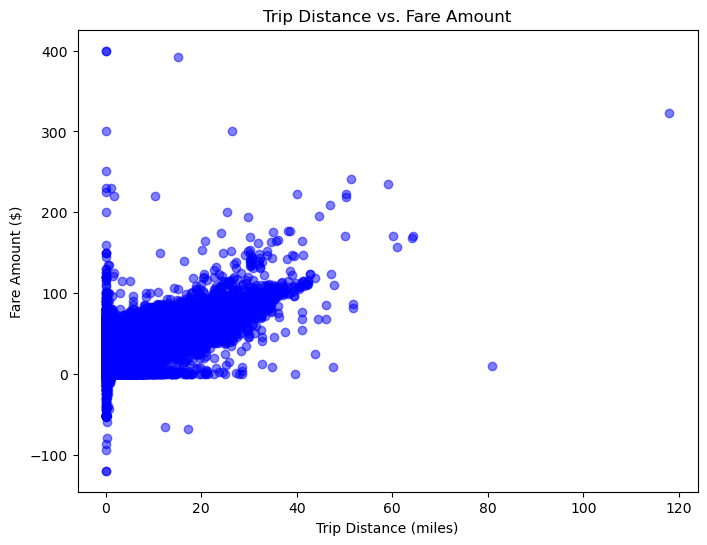

Pearson's Correlation Coefficient: 0.9300478529923584


In [20]:
# Selecting relevant columns for analysis (Trip Distance and Fare Amount)
trip_distance = data['trip distance']
fare_amount = data['fare amount']

# Plotting a scatter plot to visualize the relationship between trip distance and fare amount
plt.figure(figsize=(8, 6))
plt.scatter(trip_distance, fare_amount, alpha=0.5, color='blue')
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Calculating Pearson's correlation coefficient
correlation = trip_distance.corr(fare_amount)
print("Pearson's Correlation Coefficient:", correlation)

A Pearson's correlation coefficient of approximately 0.93 between trip distance and fare amount indicates a very strong positive correlation.

This high positive correlation suggests that, in general, as the trip distance increases, the fare amount also tends to increase substantially. The value being close to 1 indicates a nearly perfect positive linear relationship between these variables in your dataset.


### (5) How many different rate types are present, and what do they represent?

In [24]:
# Displaying unique values in the 'RateCode' column
rate_codes = data['Rate type'].unique()
print("Unique Rate Codes:", rate_codes)

Unique Rate Codes: ['Standard rate' 'Negotiated fare' 'Nassau or Westchester' 'Group ride'
 'JFK' 'Newark' 'Unknown']


The unique rate codes present in the dataset and their potential meanings are as follows:

Standard rate: This code likely represents the standard or regular fare applied to most typical taxi trips.

Negotiated fare: It might denote fares that were negotiated or agreed upon in advance between the passenger and the driver, possibly for specific or non-standard trips.

Nassau or Westchester: This code may be related to trips going to Nassau or Westchester areas, potentially indicating a flat rate or a specific fare structure for these locations.

Group ride: It could represent a special rate applied to group rides, where multiple passengers share the same trip.

JFK: This rate code might indicate a fixed fare or rate specifically for trips to or from John F. Kennedy International Airport.

Newark: Similar to 'JFK', this code might represent a specific fare structure for trips to or from Newark Liberty International Airport.

Unknown: Entries labeled as 'Unknown' might signify that the rate code information is missing or not properly recorded in those instances.

# 3 - Cleaning Data

## Tidying up column names

In [61]:
# Renaming columns to remove spaces
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.lower()

In [63]:
data.head()
print(data.columns)


Index(['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'rate_type', 'pu_location', 'do_location',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672116 entries, 0 to 672115
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Vendor                 672116 non-null  object 
 1   lpep pickup datetime   672116 non-null  object 
 2   lpep dropoff datetime  672116 non-null  object 
 3   store and fwd flag     630537 non-null  object 
 4   Rate type              672116 non-null  object 
 5   PU Location            672116 non-null  object 
 6   DO Location            672116 non-null  object 
 7   passenger count        629075 non-null  float64
 8   trip distance          672116 non-null  float64
 9   fare amount            672116 non-null  float64
 10  extra                  303954 non-null  float64
 11  mta tax                672116 non-null  float64
 12  tip amount             672116 non-null  float64
 13  tolls amount           672116 non-null  float64
 14  ehail fee              339 non-null 

## Observe and Handle inconsistent and missing data

In [39]:
# Checking for and removing duplicate rows, considering all columns
duplicates = data[data.duplicated(keep=False)]
data_no_duplicates = data.drop_duplicates()



In [40]:
data.head()

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,VeriFone Inc.,2018-12-21 15:17:29,2018-12-21 15:18:57,N,Standard rate,"Unknown,NV","Unknown,NV",5.0,0.00,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,Cash,Street-hail,NaN
1,VeriFone Inc.,2019-01-01 00:10:16,2019-01-01 00:16:32,N,Standard rate,"Brooklyn,Fort Greene","Brooklyn,Clinton Hill",2.0,0.86,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,Cash,Street-hail,NaN
2,VeriFone Inc.,2019-01-01 00:27:11,2019-01-01 00:31:38,N,Standard rate,"Brooklyn,Clinton Hill","Brooklyn,Prospect Heights",2.0,0.66,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,Credit card,Street-hail,NaN
3,VeriFone Inc.,2019-01-01 00:46:20,2019-01-01 01:04:54,N,Standard rate,"Brooklyn,Prospect Heights","Brooklyn,Bedford",2.0,2.68,13.5,0.5,0.5,2.96,0.0,NaN,0.3,19.71,Credit card,Street-hail,NaN
4,VeriFone Inc.,2019-01-01 00:19:06,2019-01-01 00:39:43,N,Standard rate,"Queens,Elmhurst","Queens,Woodhaven",1.0,4.53,18.0,0.5,0.5,0.00,0.0,NaN,0.3,19.30,Cash,Street-hail,NaN


In [49]:
# Check unique values in 'passenger_count' column
unique_passenger_count = data['passenger_count'].unique()
print("Unique Passenger Counts:", unique_passenger_count)

# Check for any negative or zero values in 'passenger_count'
invalid_passenger_count = data[data['passenger_count'] <= 0]
print("Invalid Passenger Counts (<= 0):", invalid_passenger_count)

# Check for any passenger counts above 6
high_passenger_count = data[data['passenger_count'] > 6]
print("Passenger Counts (> 6):", len(high_passenger_count))


Unique Passenger Counts: [  5.   2.   1.   3.   6.   4.  nan 444.   9.   8.   7.]
Invalid Passenger Counts (<= 0): Empty DataFrame
Columns: [vendor, lpep_pickup_datetime, lpep_dropoff_datetime, store_and_fwd_flag, rate_type, pu_location, do_location, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, ehail_fee, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge]
Index: []
Passenger Counts (> 6): 39


In [169]:
data['passenger_count'].fillna(data['passenger_count'].median(), inplace=True)
# Check unique values in 'passenger_count' column
unique_passenger_count = data['passenger_count'].unique()
print("Unique Passenger Counts:", unique_passenger_count)

# Check for any negative or zero values in 'passenger_count'
invalid_passenger_count = data[data['passenger_count'] <= 0]
print("Invalid Passenger Counts (<= 0):", invalid_passenger_count)

# Check for any passenger counts above 6
high_passenger_count = data[data['passenger_count'] > 6]
print("Passenger Counts (> 6):", len(high_passenger_count))


Unique Passenger Counts: [  2.   1.   5.   6.   3.   4. 444.   8.   7.   9.]
Invalid Passenger Counts (<= 0): Empty DataFrame
Columns: [vendor, lpep_pickup_datetime, lpep_dropoff_datetime, store_and_fwd_flag, rate_type, pu_location, do_location, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, payment_type, trip_type]
Index: []
Passenger Counts (> 6): 19


so there is 39 trips that had above 6 passengers which is very unusual assuming it is a sedan taxi, but we will check that in the outliers section

In [51]:
data.head()

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,VeriFone Inc.,2018-12-21 15:17:29,2018-12-21 15:18:57,N,Standard rate,"Unknown,NV","Unknown,NV",5.0,0.00,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,Cash,Street-hail,NaN
1,VeriFone Inc.,2019-01-01 00:10:16,2019-01-01 00:16:32,N,Standard rate,"Brooklyn,Fort Greene","Brooklyn,Clinton Hill",2.0,0.86,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,Cash,Street-hail,NaN
2,VeriFone Inc.,2019-01-01 00:27:11,2019-01-01 00:31:38,N,Standard rate,"Brooklyn,Clinton Hill","Brooklyn,Prospect Heights",2.0,0.66,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,Credit card,Street-hail,NaN
3,VeriFone Inc.,2019-01-01 00:46:20,2019-01-01 01:04:54,N,Standard rate,"Brooklyn,Prospect Heights","Brooklyn,Bedford",2.0,2.68,13.5,0.5,0.5,2.96,0.0,NaN,0.3,19.71,Credit card,Street-hail,NaN
4,VeriFone Inc.,2019-01-01 00:19:06,2019-01-01 00:39:43,N,Standard rate,"Queens,Elmhurst","Queens,Woodhaven",1.0,4.53,18.0,0.5,0.5,0.00,0.0,NaN,0.3,19.30,Cash,Street-hail,NaN


In [65]:
# Convert the column to datetime format for better analysis
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])

# Display the range and distribution of pickup datetimes
print("Earliest Pickup Datetime:", data['lpep_pickup_datetime'].min())
print("Latest Pickup Datetime:", data['lpep_pickup_datetime'].max())


Earliest Pickup Datetime: 2009-01-01 00:05:59
Latest Pickup Datetime: 2019-02-01 21:51:23


In [246]:
# Convert the 'lpep_pickup_datetime' to datetime format for filtering
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])

# Filter to find date values outside 2019
values_outside_2019 = data[~data['lpep_pickup_datetime'].dt.year.isin([2019])]

# Count the occurrences of values outside 2019
count_outside_2019 = len(values_outside_2019)

print("Count of date values outside 2019:", count_outside_2019)





Count of date values outside 2019: 47


In [247]:
# Convert the 'lpep_pickup_datetime' to datetime format for filtering
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])

# Filter to remove date values outside 2019
data = data[data['lpep_pickup_datetime'].dt.year.isin([2019])]

In [248]:
# Convert the 'lpep_pickup_datetime' to datetime format for filtering
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])

# Filter to find date values outside 2019
values_outside_2019 = data[~data['lpep_pickup_datetime'].dt.year.isin([2019])]

# Count the occurrences of values outside 2019
count_outside_2019 = len(values_outside_2019)

print("Count of date values outside 2019:", count_outside_2019)



Count of date values outside 2019: 0


latest pickup time is 2/1/2019 that's why congestive surcharge is missing. There is no any irregularities that we could find

In [66]:
# Check for missing values in the 'ipep pickup datetime' column
missing_pickup_datetime = data['lpep_pickup_datetime'].isnull().sum()
print("Missing Pickup Datetime Entries:", missing_pickup_datetime)

Missing Pickup Datetime Entries: 0


No missing values so no problem here

In [67]:
# Display the range and distribution of dropoff datetimes
print("Earliest Dropoff Datetime:", data['lpep_dropoff_datetime'].min())
print("Latest Dropoff Datetime:", data['lpep_dropoff_datetime'].max())


Earliest Dropoff Datetime: 2009-01-01 00:06:03
Latest Dropoff Datetime: 2019-02-01 23:10:47


In [68]:
missing_dropoff_datetime = data['lpep_dropoff_datetime'].isnull().sum()
print("Missing Dropoff Datetime Entries:", missing_dropoff_datetime)

Missing Dropoff Datetime Entries: 0


No missing values and no irregularities here

In [71]:
# Display unique values in the 'vendor' column
unique_vendors = data['vendor'].unique()
print("Unique Vendors:", unique_vendors)

# Count occurrences of each unique vendor
vendor_counts = data['vendor'].value_counts()
print("Vendor Counts:\n", vendor_counts)


Unique Vendors: ['VeriFone Inc.' 'Creative Mobile Technologies, LLC' 'Unknown']
Vendor Counts:
 vendor
VeriFone Inc.                        578430
Creative Mobile Technologies, LLC     93684
Unknown                                   2
Name: count, dtype: int64


only 2 unknown values everything else is safe and sound, since they are super low compared to the total data set and we they are MCAR, we can just drop them

In [73]:
# Drop rows with 'Unknown' in the 'vendor' column
data = data[data['vendor'] != 'Unknown']

# Count occurrences of each unique vendor
vendor_counts = data['vendor'].value_counts()
print("Vendor Counts:\n", vendor_counts)



Vendor Counts:
 vendor
VeriFone Inc.                        578430
Creative Mobile Technologies, LLC     93684
Name: count, dtype: int64


from the discussion done in the first section, store and fwd flag had some, but not many, nan values. since it's a flag, it's suitable to replace the nan values with the mode

In [80]:
# Replace NaN values with the most frequent category in 'store and fwd flag'
most_frequent_category = data['store_and_fwd_flag'].mode()[0]
data['store_and_fwd_flag'].fillna(most_frequent_category, inplace=True)


C:\Users\anaya\AppData\Local\Temp\ipykernel_30748\967218395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['store_and_fwd_flag'].fillna(most_frequent_category, inplace=True)


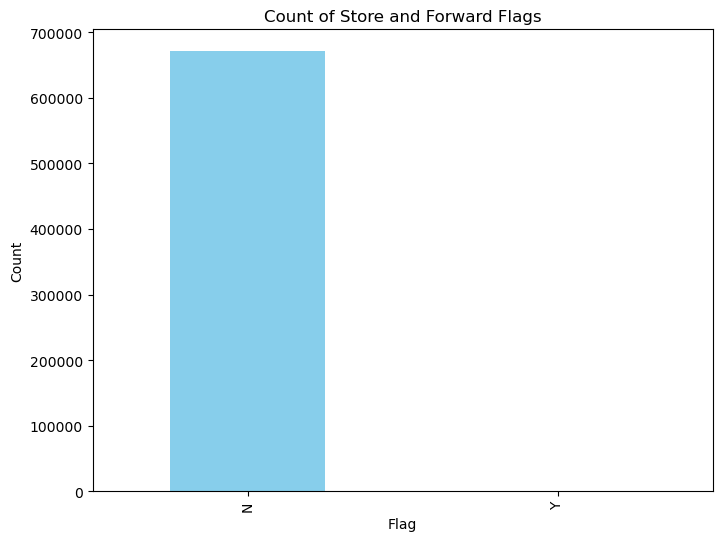

Store Counts:
 store_and_fwd_flag
N    670866
Y      1248
Name: count, dtype: int64


In [83]:
value_counts = data['store_and_fwd_flag'].value_counts(dropna=False)

# Plotting the count of 'store and fwd flag' values using Pandas
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Store and Forward Flags')
plt.xlabel('Flag')
plt.ylabel('Count')
plt.show()


store_counts = data['store_and_fwd_flag'].value_counts()
print("Store Counts:\n", store_counts)

we know that there are unkown values in the rate types as that of the previous discussion presented in the first section, now let's count them and handle them

In [85]:
# Count occurrences of 'Unknown' in the 'RateCode' column
unknown_rates_count = data[data['rate_type'] == 'Unknown'].shape[0]
print("Count of 'Unknown' Rate Types:", unknown_rates_count)


Count of 'Unknown' Rate Types: 41577


so unkown is about 6% of the total Rate types

In [87]:
# Identify the most frequent rate type
most_frequent_rate = data['rate_type'].mode()[0]

# Replace 'Unknown' entries with the most frequent rate type
data['rate_type'] = data['rate_type'].replace('Unknown', most_frequent_rate)




C:\Users\anaya\AppData\Local\Temp\ipykernel_30748\4135872925.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rate_type'] = data['rate_type'].replace('Unknown', most_frequent_rate)


In [89]:
# Count occurrences of 'Unknown' in the 'RateCode' column
unknown_rates_count = data[data['rate_type'] == 'Unknown'].shape[0]
print("Count of 'Unknown' Rate Types:", unknown_rates_count)


Count of 'Unknown' Rate Types: 0


In [91]:
# Display the data type and sample values of the 'PU Location' column
print(data['pu_location'].dtype)
print(data['pu_location'].head())


object
0                   Unknown,NV
1         Brooklyn,Fort Greene
2        Brooklyn,Clinton Hill
3    Brooklyn,Prospect Heights
4              Queens,Elmhurst
Name: pu_location, dtype: object


In [94]:
# Count entries with 'Unknown' in 'PU Location'
unknown_count = data[data['pu_location'].str.contains('Unknown')].shape[0]

unknown_alone_count = data[data['pu_location'] == 'Unknown'].shape[0]


# Display count of 'Unknown' and other variations in 'PU Location'
print("Count of entries with 'Unknown' in PU Location:", unknown_count)


print("Count of 'Unknown' entries on their own in PU Location:", unknown_alone_count)



Count of entries with 'Unknown' in PU Location: 1329
Count of 'Unknown' entries on their own in PU Location: 0


This means that every Unkown value in the PU location column is part of a not complete address not a full unkown value The presence of 'Unknown' as part of another value in the 'PU Location' column suggests a form of Missing Not At Random (MNAR) situation.

MNAR refers to missing data that is not random and is related to unobserved data. In this case, the presence of 'Unknown' in the 'PU Location' data could be due to unrecorded or unavailable information about the specific pickup locations. The 'Unknown' string might represent locations that were not captured or documented, leading to missing data that is correlated with the reason for being unrecorded.

In [95]:
# Count entries with 'Unknown' in 'DO Location'
unknown_count = data[data['do_location'].str.contains('Unknown')].shape[0]

unknown_alone_count = data[data['do_location'] == 'Unknown'].shape[0]


# Display count of 'Unknown' and other variations in 'PU Location'
print("Count of entries with 'Unknown' in DO Location:", unknown_count)


print("Count of 'Unknown' entries on their own in DO Location:", unknown_alone_count)


Count of entries with 'Unknown' in DO Location: 1884
Count of 'Unknown' entries on their own in DO Location: 0


exactly the same case as PU Location

we checked the consistency of the number of passenger column in the previous section, and we found out that it has outliers that we will handle on an upcoming section

In [97]:
# Checking for inconsistencies or unrealistic values in the 'Trip Distance' column
inconsistent_trip_distance = data[(data['trip_distance'] < 0)].shape[0]
print("Inconsistent (negative) Trip Distances:", inconsistent_trip_distance)


Inconsistent (negative) Trip Distances: 0


no inconsistent data

In [99]:
# Count occurrences of zero values in the 'Trip Distance' column
zero_trip_distance = data[data['trip_distance'] == 0].shape[0]

# Count missing values in the 'Trip Distance' column
missing_trip_distance = data['trip_distance'].isnull().sum()

print("Count of zero values in Trip Distance:", zero_trip_distance)
print("Missing values in Trip Distance:", missing_trip_distance)

Count of zero values in Trip Distance: 11095
Missing values in Trip Distance: 0


In [100]:
# Filter entries with zero trip distance
zero_distance_entries = data[data['trip_distance'] == 0]

# Check if starting and ending points are the same for entries with zero trip distance
same_start_end_location = zero_distance_entries[zero_distance_entries['pu_location'] == zero_distance_entries['do_location']]
print("Count of zero distance trips with the same start and end location:", same_start_end_location.shape[0])


Count of zero distance trips with the same start and end location: 8594


In [101]:
# Filter entries with both the same start and end location and zero trip distance
same_start_end_zero_distance = zero_distance_entries[zero_distance_entries['pu_location'] == zero_distance_entries['do_location']]

# Display trip distances for these entries
print(same_start_end_zero_distance['trip_distance'].unique())


[0.]


In [102]:
# Filter entries with both the same start and end location and zero trip distance
same_start_end_zero_distance = zero_distance_entries[zero_distance_entries['pu_location'] == zero_distance_entries['do_location']]

# Display trip distances for these entries
print(same_start_end_zero_distance['total_amount'].unique())


[ 4.3000e+00  6.0000e+01  4.5000e+01  1.2000e+01  3.8000e+00 -3.8000e+00
  5.5000e+01  2.5050e+02  1.8000e+01  4.7800e+01 -6.3000e+00  6.3000e+00
  2.2000e+01  4.0000e+01  2.0000e+01  1.8800e+01  1.0000e+01  2.5000e+01
  9.8000e+00  3.0000e+01  9.0000e+00  2.4000e+01  2.7000e+01  9.2000e+00
  1.5000e+01  5.1000e+00  6.5000e+01  4.9400e+00  3.8800e+01  1.9000e+01
  5.0000e+01  9.6600e+01  4.2000e+01  1.6900e+01  7.2000e+00  1.2960e+01
  0.0000e+00  7.2000e+01  2.2050e+01  4.5000e-01  6.3800e+01  1.4400e+01
  1.5600e+02  1.5800e+01  7.1890e+01  1.5600e+01  3.0660e+01  2.6400e+01
  6.6000e+01  1.5080e+02  2.6000e+01  3.3000e+00  1.7000e+01  5.2000e+01
  3.0450e+01  2.0550e+01  2.0300e+01  1.1000e+01  2.1110e+01  1.5500e+01
  6.0010e+01  4.8000e+01  5.3800e+00  3.0300e+01  8.0000e+00  4.0330e+01
  3.9600e+00  2.2870e+01 -3.3000e+00  1.5550e+01  2.1000e+01  5.3000e+00
  1.3300e+01  2.2750e+01  5.9600e+00  2.3000e+01  1.4000e+01  1.1060e+01
  5.0000e-01  2.0800e+01  4.4500e+00  1.0800e+01  5

In [103]:
# Filter entries with both the same start and end location and zero trip distance
same_start_end_zero_distance = zero_distance_entries[zero_distance_entries['pu_location'] == zero_distance_entries['do_location']]

# Display trip distances for these entries
print(same_start_end_zero_distance['payment_type'].unique())

['Cash' 'Credit card' 'No charge' nan 'Dispute' 'Uknown' 'Unknown']


so after finding out that there are trip distances that are zero and the majority of them has the starting point and ending point the same. not only that, but many other column values for these rows are missing or inconsistent, it's found that it's acceptable to remove all the rows with starting point and ending point the same

In [104]:
# Filter rows where pickup and dropoff locations are not the same
different_start_end = data[data['pu_location'] != data['do_location']]

# Update the dataset to retain only the rows where pickup and dropoff locations are different
data = different_start_end.copy()


In [105]:
# Filter entries with zero trip distance
zero_distance_entries = data[data['trip_distance'] == 0]

# Check if starting and ending points are the same for entries with zero trip distance
same_start_end_location = zero_distance_entries[zero_distance_entries['pu_location'] == zero_distance_entries['do_location']]
print("Count of zero distance trips with the same start and end location:", same_start_end_location.shape[0])


Count of zero distance trips with the same start and end location: 0


the values removed can be classified as MNAR

now let's replace the other missing values with the median

In [106]:
# Calculate the median of non-zero trip distances
median_trip_distance = data[data['trip_distance'] != 0]['trip_distance'].median()

# Replace the zero values in 'Trip Distance' with the calculated median
data.loc[data['trip_distance'] == 0, 'trip_distance'] = median_trip_distance


In [107]:
# Count occurrences of zero values in the 'Trip Distance' column
zero_trip_distance = data[data['trip_distance'] == 0].shape[0]

# Count missing values in the 'Trip Distance' column
missing_trip_distance = data['trip_distance'].isnull().sum()

print("Count of zero values in Trip Distance:", zero_trip_distance)
print("Missing values in Trip Distance:", missing_trip_distance)

Count of zero values in Trip Distance: 0
Missing values in Trip Distance: 0


In [111]:
# Check for missing values in 'Fare Amount' column
missing_fare_amount = data['fare_amount'].isnull().sum()

# Check for inconsistencies or negative values in 'Fare Amount'
negative_fare_amount = data[data['fare_amount'] < 0].shape[0]

# Check for zero values in 'Fare Amount'
zero_fare_amount = data[data['fare_amount'] == 0].shape[0]

print("Missing values in Fare Amount:", missing_fare_amount)
print("Inconsistent or negative Fare Amount entries:", negative_fare_amount)
print("Zero values in Fare Amount:", zero_fare_amount)



Missing values in Fare Amount: 0
Inconsistent or negative Fare Amount entries: 727
Zero values in Fare Amount: 703


In [205]:
# Select rows with missing values in 'Fare Amount' (zeros or NaN)
missing_fare = data[data['fare_amount'] == 0]

# Check the payment type for these missing fare entries
payment_types_missing_fare = missing_fare['payment_type'].value_counts()



# Calculate the median of fare_amount
fare_amount_median = data['fare_amount'].median()

# Replace negative values with the median
data.loc[data['fare_amount'] < 0, 'fare_amount'] = fare_amount_median


print("Payment Types for missing Fare Amount:")
print(payment_types_missing_fare)


Payment Types for missing Fare Amount:
payment_type
Cash           451
Credit card    128
Dispute         17
No charge       10
Name: count, dtype: int64


most of the missing values are paid by cash, so they are considered as MNAR

In [114]:
# Calculate the mean of non-missing and non-zero fare amounts
fare_mean = data[(data['fare_amount'].notnull()) & (data['fare_amount'] != 0)]['fare_amount'].mean()

# Replace missing and zero fare amounts with the calculated mean
data['fare_amount'].fillna(fare_mean, inplace=True)


In [118]:
# Count zero and missing values in 'Extra' column
zero_extra = data[data['extra'] <= 0].shape[0]
missing_extra = data['extra'].isnull().sum()

print(f"Zero or less values in 'Extra' column: {zero_extra}")
print(f"Missing values in 'Extra' column: {missing_extra}")


Zero or less values in 'Extra' column: 338
Missing values in 'Extra' column: 319107


In [117]:
unique_extra_values = data['extra'].unique()
print(unique_extra_values)


[ 0.5    nan -0.5   1.    4.5  -1.    1.8   2.75  5.5   8.25]


In [ ]:
since there are no 0 values for extra column, most probably the peson who entered the data didn't add the zeros so it became a nan, so now let's replace the negative values with the median and the missing values with zeroes

In [120]:
# Replace negative values with the median of non-negative values
median_extra = data[data['extra'] >= 0]['extra'].median()
data['extra'] = data['extra'].apply(lambda x: median_extra if x < 0 else x)

# Replace missing values with zeroes
data['extra'].fillna(0, inplace=True)


In [121]:
unique_extra_values = data['extra'].unique()
print(unique_extra_values)

[0.5  0.   1.   4.5  1.8  2.75 5.5  8.25]


In [122]:
# Check unique values in 'MTA_tax' column
unique_mta_tax = data['mta_tax'].unique()
print(unique_mta_tax)

# Count zero and missing values in 'MTA_tax' column
zero_mta_tax = data[data['mta_tax'] == 0].shape[0]
missing_mta_tax = data['mta_tax'].isnull().sum()
negative_mta_tax = data[data['mta_tax'] < 0].shape[0]

print(f"Zero values in 'MTA_tax' column: {zero_mta_tax}")
print(f"Missing values in 'MTA_tax' column: {missing_mta_tax}")
print(f"Negative values in 'MTA_tax' column: {negative_mta_tax}")


[ 0.5  0.  -0.5  3.8]
Zero values in 'MTA_tax' column: 6654
Missing values in 'MTA_tax' column: 0
Negative values in 'MTA_tax' column: 713


0 values for MTA is normal but what is not normal is the negative ones, let's replace the negative values with the median

In [123]:
# Calculate the median of non-negative values in 'MTA_tax' column
median_mta_tax = data[data['mta_tax'] >= 0]['mta_tax'].median()

# Replace negative values with the median
data['mta_tax'] = data['mta_tax'].apply(lambda x: median_mta_tax if x < 0 else x)


In [131]:
# Check unique values in 'MTA_tax' column
unique_mta_tax = data['mta_tax'].unique()
print(unique_mta_tax)

# Count zero and missing values in 'MTA_tax' column
zero_mta_tax = data[data['mta_tax'] == 0].shape[0]
missing_mta_tax = data['mta_tax'].isnull().sum()
negative_mta_tax = data[data['mta_tax'] < 0].shape[0]

print(f"Zero values in 'MTA_tax' column: {zero_mta_tax}")
print(f"Missing values in 'MTA_tax' column: {missing_mta_tax}")
print(f"Negative values in 'MTA_tax' column: {negative_mta_tax}")


[0.5 0.  3.8]
Zero values in 'MTA_tax' column: 6654
Missing values in 'MTA_tax' column: 0
Negative values in 'MTA_tax' column: 0


In [133]:
# Check unique values in 'tip_amount' column
unique_tip_amount = data['tip_amount'].unique()
print(unique_tip_amount)

# Count zero and missing values in 'tip_amount' column
zero_tip_amount = data[data['tip_amount'] == 0].shape[0]
missing_tip_amount = data['tip_amount'].isnull().sum()
negative_tip_amount = data[data['tip_amount'] < 0].shape[0]

print(f"Zero values in 'tip_amount' column: {zero_tip_amount}")
print(f"Missing values in 'tip_amount' column: {missing_tip_amount}")
print(f"Negative values in 'tip_amount' column: {negative_tip_amount}")


[ 0.    2.96  8.   ... 12.89 10.13 15.95]
Zero values in 'tip_amount' column: 392401
Missing values in 'tip_amount' column: 0
Negative values in 'tip_amount' column: 0


negative values are not normal, let's replace them with the mean

In [134]:
# Calculate the mean of non-negative values in 'tip_amount' column
mean_tip_amount = data[data['tip_amount'] >= 0]['tip_amount'].mean()

# Replace negative values with the mean
data['tip_amount'] = data['tip_amount'].apply(lambda x: mean_tip_amount if x < 0 else x)

# Check unique values in 'tip_amount' column
unique_tip_amount = data['tip_amount'].unique()
print(unique_tip_amount)

# Count zero and missing values in 'MTA_tax' column
zero_tip_amount = data[data['tip_amount'] == 0].shape[0]
missing_tip_amount = data['tip_amount'].isnull().sum()
negative_tip_amount = data[data['tip_amount'] < 0].shape[0]

print(f"Zero values in 'tip_amount' column: {zero_tip_amount}")
print(f"Missing values in 'tip_amount' column: {missing_tip_amount}")
print(f"Negative values in 'tip_amount' column: {negative_tip_amount}")


[ 0.    2.96  8.   ... 12.89 10.13 15.95]
Zero values in 'tip_amount' column: 392401
Missing values in 'tip_amount' column: 0
Negative values in 'tip_amount' column: 0


In [135]:
# Unique values in 'tolls_amount' column
unique_tolls_amount = data['tolls_amount'].unique()
print(unique_tolls_amount)

# Count zero and negative values in 'tolls_amount' column
zero_tolls_amount = data[data['tolls_amount'] == 0].shape[0]
missing_tolls_amount = data['tolls_amount'].isnull().sum()
negative_tolls_amount = data[data['tolls_amount'] < 0].shape[0]

print(f"Zero values in 'tolls_amount' column: {zero_tolls_amount}")
print(f"Missing values in 'tolls_amount' column: {missing_tolls_amount}")
print(f"Negative values in 'tolls_amount' column: {negative_tolls_amount}")


[0.000e+00 5.760e+00 7.920e+00 2.640e+00 2.160e+00 1.152e+01 1.950e+00
 1.266e+01 2.500e+01 8.500e+00 1.050e+01 1.626e+01 1.950e+01 1.250e+01
 2.100e+01 5.000e+00 5.780e+00 5.500e+00 1.728e+01 5.750e+00 4.320e+00
 4.000e+00 2.150e+00 5.540e+00 1.826e+01 5.280e+00 1.000e+01 3.000e+00
 8.400e+00 5.770e+00 4.500e+00 1.126e+01 1.576e+01 1.416e+01 2.304e+01
 3.000e-02 8.760e+00 1.076e+01 9.000e-02 1.176e+01 1.800e+01 1.500e+01
 5.740e+00 2.000e+00 2.300e+01 2.530e+00 6.750e+00 1.154e+01 1.108e+01
 2.800e+01 1.992e+01 1.100e+01 2.402e+01 1.160e+01 5.470e+00 1.008e+01
 3.500e+00 6.500e+00 1.368e+01 1.151e+01 1.276e+01 8.000e+00 2.750e+00
 2.000e+01 1.000e+00 2.202e+01 1.523e+01 4.160e+00 2.090e+01 4.010e+00
 8.300e+00 1.900e+01 4.370e+00 4.000e-02 1.241e+01 3.750e+00 3.440e+00
 2.740e+00 3.910e+00 1.750e+00 1.700e+01 2.730e+00 6.800e+01 1.150e+00
 1.300e+00 5.670e+00 2.264e+01 3.010e+00 3.120e+00 5.730e+00 1.030e+00
 1.750e+01 1.426e+01 2.400e+01 4.800e+00 3.710e+00 1.730e+00 1.740e+00
 3.110

everything seems good here

In [136]:
# Unique values in 'ehail_fee' column
unique_ehail_fee = data['ehail_fee'].unique()
print(unique_ehail_fee)

# Count zero and negative values in 'ehail_fee' column
zero_ehail_fee = data[data['ehail_fee'] == 0].shape[0]
missing_ehail_fee = data['ehail_fee'].isnull().sum()
negative_ehail_fee = data[data['ehail_fee'] < 0].shape[0]

print(f"Zero values in 'ehail_fee' column: {zero_ehail_fee}")
print(f"Missing values in 'ehail_fee' column: {missing_ehail_fee}")
print(f"Negative values in 'ehail_fee' column: {negative_ehail_fee}")


[ nan 0.   1.95]
Zero values in 'ehail_fee' column: 300
Missing values in 'ehail_fee' column: 581320
Negative values in 'ehail_fee' column: 0


86% of the values are missing, let's just drop this column

In [137]:
data.drop('ehail_fee', axis=1, inplace=True)

In [138]:
# Unique values in 'improvement_surcharge' column
unique_improvement_surcharge = data['improvement_surcharge'].unique()
print(unique_improvement_surcharge)

# Count zero and negative values in 'improvement_surcharge' column
zero_improvement_surcharge = data[data['improvement_surcharge'] == 0].shape[0]
missing_improvement_surcharge = data['improvement_surcharge'].isnull().sum()
negative_improvement_surcharge = data[data['improvement_surcharge'] < 0].shape[0]

print(f"Zero values in 'improvement_surcharge' column: {zero_improvement_surcharge}")
print(f"Missing values in 'improvement_surcharge' column: {missing_improvement_surcharge}")
print(f"Negative values in 'improvement_surcharge' column: {negative_improvement_surcharge}")


[ 0.3  0.  -0.3]
Zero values in 'improvement_surcharge' column: 87905
Missing values in 'improvement_surcharge' column: 0
Negative values in 'improvement_surcharge' column: 713


let's replace the negative values with the mode because it's some kind of categorical column

In [139]:
# Find the mode of the 'improvement_surcharge' column
mode_improvement_surcharge = data['improvement_surcharge'].mode()[0]

# Replace negative values with the mode
data.loc[data['improvement_surcharge'] < 0, 'improvement_surcharge'] = mode_improvement_surcharge


In [140]:
# Unique values in 'improvement_surcharge' column
unique_improvement_surcharge = data['improvement_surcharge'].unique()
print(unique_improvement_surcharge)

# Count zero and negative values in 'improvement_surcharge' column
zero_improvement_surcharge = data[data['improvement_surcharge'] == 0].shape[0]
missing_improvement_surcharge = data['improvement_surcharge'].isnull().sum()
negative_improvement_surcharge = data[data['improvement_surcharge'] < 0].shape[0]

print(f"Zero values in 'improvement_surcharge' column: {zero_improvement_surcharge}")
print(f"Missing values in 'improvement_surcharge' column: {missing_improvement_surcharge}")
print(f"Negative values in 'improvement_surcharge' column: {negative_improvement_surcharge}")


[0.3 0. ]
Zero values in 'improvement_surcharge' column: 87905
Missing values in 'improvement_surcharge' column: 0
Negative values in 'improvement_surcharge' column: 0


In [141]:
# Unique values in 'total_amount' column
unique_total_amount = data['total_amount'].unique()
print(unique_total_amount)

# Count zero and negative values in 'total_amount' column
zero_total_amount = data[data['total_amount'] == 0].shape[0]
missing_total_amount = data['total_amount'].isnull().sum()
negative_total_amount = data[data['total_amount'] < 0].shape[0]

print(f"Zero values in 'total_amount' column: {zero_total_amount}")
print(f"Missing values in 'total_amount' column: {missing_total_amount}")
print(f"Negative values in 'total_amount' column: {negative_total_amount}")


[  7.3    5.8   19.71 ... 109.5  112.25 120.5 ]
Zero values in 'total_amount' column: 681
Missing values in 'total_amount' column: 0
Negative values in 'total_amount' column: 727


let's replace the negative values with the median

In [142]:
# Find the median of the 'total_amount' column
median_total_amount = data['total_amount'].median()

# Replace negative values with the median
data.loc[data['total_amount'] < 0, 'total_amount'] = median_total_amount


In [143]:
# Unique values in 'total_amount' column
unique_total_amount = data['total_amount'].unique()
print(unique_total_amount)

# Count zero and negative values in 'total_amount' column
zero_total_amount = data[data['total_amount'] == 0].shape[0]
missing_total_amount = data['total_amount'].isnull().sum()
negative_total_amount = data[data['total_amount'] < 0].shape[0]

print(f"Zero values in 'total_amount' column: {zero_total_amount}")
print(f"Missing values in 'total_amount' column: {missing_total_amount}")
print(f"Negative values in 'total_amount' column: {negative_total_amount}")


[  7.3    5.8   19.71 ... 109.5  112.25 120.5 ]
Zero values in 'total_amount' column: 681
Missing values in 'total_amount' column: 0
Negative values in 'total_amount' column: 0


In [145]:
# Unique values and their counts in 'payment_type' column
payment_type_counts = data['payment_type'].value_counts()
print(payment_type_counts)


payment_type
Credit card    338699
Cash           186287
Unknown         40953
No charge        1183
Dispute           610
Uknown             16
Name: count, dtype: int64


let's replace unkown and 'uknown' with the mode

In [146]:
# Replace 'Unknown' and 'Uknown' with the mode in 'payment_type' column
mode_payment_type = data['payment_type'].mode()[0]
data['payment_type'].replace(['Unknown', 'Uknown'], mode_payment_type, inplace=True)


In [147]:
# Unique values and their counts in 'payment_type' column
payment_type_counts = data['payment_type'].value_counts()
print(payment_type_counts)


payment_type
Credit card    379668
Cash           186287
No charge        1183
Dispute           610
Name: count, dtype: int64


In [148]:
# Unique values and their counts in 'trip_type' column
trip_type_counts = data['trip_type'].value_counts()
print(trip_type_counts)


trip_type
Street-hail    493014
Dispatch        47353
Unknown         41257
Name: count, dtype: int64


In [149]:
# Replace 'Unknown' with the mode in 'trip_type' column
mode_trip_type = data['trip_type'].mode()[0]
data['trip_type'].replace('Unknown', mode_trip_type, inplace=True)


In [150]:
# Unique values and their counts in 'trip_type' column
trip_type_counts = data['trip_type'].value_counts()
print(trip_type_counts)


trip_type
Street-hail    534271
Dispatch        47353
Name: count, dtype: int64


from our discussion about congestion surcharge in the first section, we can just conclude that the column should be dropped

In [152]:
# Drop the 'congestion surcharge' column
data.drop('congestion_surcharge', axis=1, inplace=True)


In [153]:
data.head()

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
1,VeriFone Inc.,2019-01-01 00:10:16,2019-01-01 00:16:32,N,Standard rate,"Brooklyn,Fort Greene","Brooklyn,Clinton Hill",2.0,0.86,6.0,0.5,0.5,0.00,0.0,0.3,7.30,Cash,Street-hail
2,VeriFone Inc.,2019-01-01 00:27:11,2019-01-01 00:31:38,N,Standard rate,"Brooklyn,Clinton Hill","Brooklyn,Prospect Heights",2.0,0.66,4.5,0.5,0.5,0.00,0.0,0.3,5.80,Credit card,Street-hail
3,VeriFone Inc.,2019-01-01 00:46:20,2019-01-01 01:04:54,N,Standard rate,"Brooklyn,Prospect Heights","Brooklyn,Bedford",2.0,2.68,13.5,0.5,0.5,2.96,0.0,0.3,19.71,Credit card,Street-hail
4,VeriFone Inc.,2019-01-01 00:19:06,2019-01-01 00:39:43,N,Standard rate,"Queens,Elmhurst","Queens,Woodhaven",1.0,4.53,18.0,0.5,0.5,0.00,0.0,0.3,19.30,Cash,Street-hail
5,VeriFone Inc.,2019-01-01 00:12:35,2019-01-01 00:19:09,N,Standard rate,"Brooklyn,Clinton Hill","Brooklyn,Bedford",1.0,1.05,6.5,0.5,0.5,0.00,0.0,0.3,7.80,Credit card,Street-hail


## Observing and Handling outliers

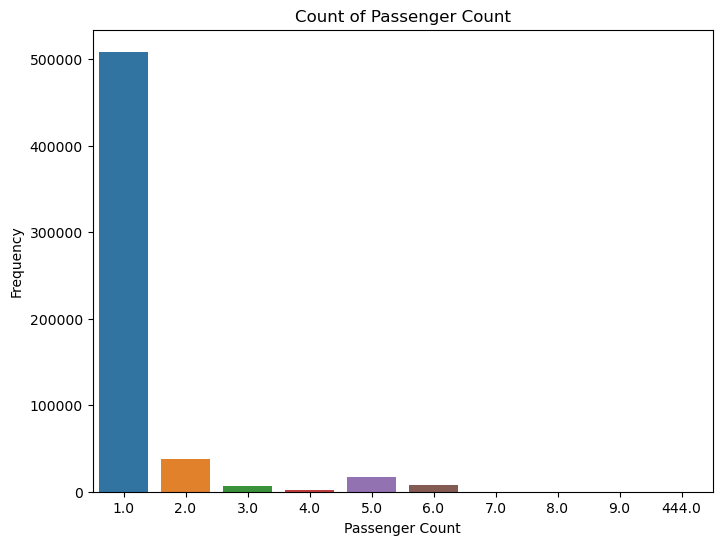

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count of passenger_count values
passenger_count_counts = data['passenger_count'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=passenger_count_counts.index, y=passenger_count_counts.values)
plt.title('Count of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()


it's obvious that 444 is an outlier, let's replace it with the mode

In [175]:
# Find the mode of the 'passenger_count' column
mode_passenger_count = data['passenger_count'].mode()[0]

# Replace rows with '444' in 'passenger_count' with the mode
data.loc[data['passenger_count'] == 444, 'passenger_count'] = mode_passenger_count


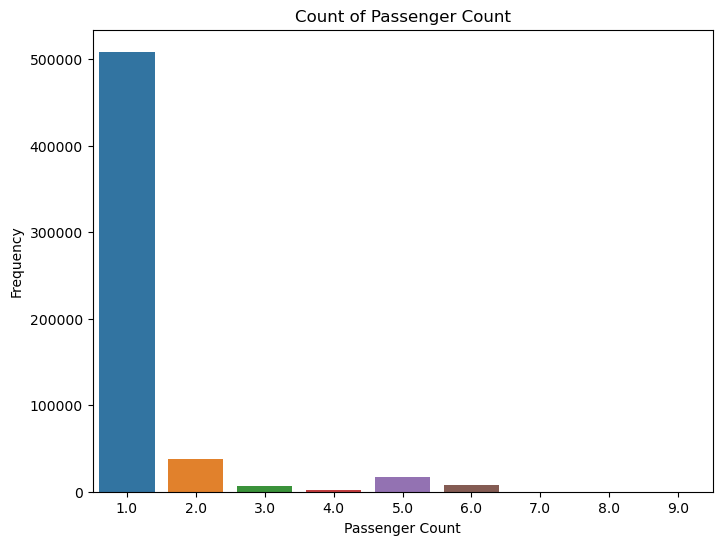

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count of passenger_count values
passenger_count_counts = data['passenger_count'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=passenger_count_counts.index, y=passenger_count_counts.values)
plt.title('Count of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()


perfect.

we skipped the first 8 columns because they are categorical values and we elimnated the inconsistent values already or they are not but we checked the extreme values already in the previous section 

In [193]:
from scipy.stats import shapiro

def is_normal(column_data):
    # Shapiro-Wilk test
    _, p_value = shapiro(column_data)
    
    # Set a significance level (0.05 is commonly used)
    alpha = 0.05
    
    # Output True if p-value is higher than alpha (not rejecting null hypothesis of normality)
    return p_value > alpha



In [195]:

result = is_normal(data['trip_distance'])
print("Is 'trip_distance' normally distributed:", result)

Is 'trip_distance' normally distributed: False


C:\Users\anaya\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


it's not normally distributed so we will use the IQR method

In [196]:
def handle_outliers_iqr(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clipping outliers
    column_data = column_data.clip(lower=lower_bound, upper=upper_bound)
    return column_data


In [197]:
data['trip_distance'] = handle_outliers_iqr(data['trip_distance'])

In [198]:
data.describe()

,lpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,581624,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000
mean,2019-01-16 16:51:55.183897344,1.293721,3.865899,17.056626,0.479617,0.494285,0.858617,0.338081,0.254659,19.526311
min,2009-01-01 00:06:03,1.000000,0.010000,-68.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-01-09 09:33:23.750000128,1.000000,1.400000,7.500000,0.000000,0.500000,0.000000,0.000000,0.300000,9.360000
50%,2019-01-16 16:50:18.500000,1.000000,2.590000,12.000000,0.000000,0.500000,0.000000,0.000000,0.300000,14.140000
75%,2019-01-24 16:47:07.750000128,1.000000,5.370000,21.340000,0.500000,0.500000,1.470000,0.000000,0.300000,23.800000
max,2019-02-01 21:51:23,9.000000,11.325000,392.500000,8.250000,3.800000,100.000000,95.760000,0.300000,393.800000
std,NaN,0.951630,3.272636,14.145225,0.791142,0.053349,1.676462,1.431611,0.107455,15.188555


notice that now the trip distance does not have outliers!

from data.describe() we can see that only fare_amount, tip_amount,tolls amount and total amount are the columns that have outliers, let's handle them

In [200]:
result = is_normal(data['fare_amount'])
print("Is 'fare_amount' normally distributed:", result)

Is 'fare_amount' normally distributed: False


Not normally distributed so we will need to use the IQR method

In [201]:
data['fare_amount'] = handle_outliers_iqr(data['fare_amount'])

In [206]:
data.describe()

,lpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,581624,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000
mean,2019-01-16 16:51:55.183897344,1.293721,3.865899,16.100015,0.479617,0.494285,0.858617,0.338081,0.254659,19.526311
min,2009-01-01 00:06:03,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-01-09 09:33:23.750000128,1.000000,1.400000,7.500000,0.000000,0.500000,0.000000,0.000000,0.300000,9.360000
50%,2019-01-16 16:50:18.500000,1.000000,2.590000,12.000000,0.000000,0.500000,0.000000,0.000000,0.300000,14.140000
75%,2019-01-24 16:47:07.750000128,1.000000,5.370000,21.340000,0.500000,0.500000,1.470000,0.000000,0.300000,23.800000
max,2019-02-01 21:51:23,9.000000,11.325000,42.100000,8.250000,3.800000,100.000000,95.760000,0.300000,393.800000
std,NaN,0.951630,3.272636,11.240633,0.791142,0.053349,1.676462,1.431611,0.107455,15.188555


fixed, now let's check tip_amount

In [207]:
result = is_normal(data['tip_amount'])
print("Is 'tip_amount' normally distributed:", result)

Is 'tip_amount' normally distributed: False


C:\Users\anaya\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


again, not normally distributed, let's use IQR

In [208]:
data['tip_amount'] = handle_outliers_iqr(data['tip_amount'])

In [210]:
data.describe()

,lpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,581624,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000
mean,2019-01-16 16:51:55.183897344,1.293721,3.865899,16.100015,0.479617,0.494285,0.742819,0.338081,0.254659,19.526311
min,2009-01-01 00:06:03,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-01-09 09:33:23.750000128,1.000000,1.400000,7.500000,0.000000,0.500000,0.000000,0.000000,0.300000,9.360000
50%,2019-01-16 16:50:18.500000,1.000000,2.590000,12.000000,0.000000,0.500000,0.000000,0.000000,0.300000,14.140000
75%,2019-01-24 16:47:07.750000128,1.000000,5.370000,21.340000,0.500000,0.500000,1.470000,0.000000,0.300000,23.800000
max,2019-02-01 21:51:23,9.000000,11.325000,42.100000,8.250000,3.800000,3.675000,95.760000,0.300000,393.800000
std,NaN,0.951630,3.272636,11.240633,0.791142,0.053349,1.197226,1.431611,0.107455,15.188555


Fixed. now let's handle tolls_amount and total_amount's outliers both at the same time.

In [211]:
result = is_normal(data['tolls_amount'])
print("Is 'tolls_amount' normally distributed:", result)

result = is_normal(data['total_amount'])
print("Is 'total_amount' normally distributed:", result)

Is 'tolls_amount' normally distributed: False
Is 'total_amount' normally distributed: False


C:\Users\anaya\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


let's use IQR for both and see the result.

In [216]:
data['tolls_amount'] = handle_outliers_iqr(data['tolls_amount'])

data['total_amount'] = handle_outliers_iqr(data['total_amount'])

In [215]:
data.describe()

,lpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,581624,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000,581624.000000,581624.0,581624.000000,581624.000000
mean,2019-01-16 16:51:55.183897344,1.293721,3.865899,16.100015,0.479617,0.494285,0.742819,0.0,0.254659,18.393165
min,2009-01-01 00:06:03,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2019-01-09 09:33:23.750000128,1.000000,1.400000,7.500000,0.000000,0.500000,0.000000,0.0,0.300000,9.360000
50%,2019-01-16 16:50:18.500000,1.000000,2.590000,12.000000,0.000000,0.500000,0.000000,0.0,0.300000,14.140000
75%,2019-01-24 16:47:07.750000128,1.000000,5.370000,21.340000,0.500000,0.500000,1.470000,0.0,0.300000,23.800000
max,2019-02-01 21:51:23,9.000000,11.325000,42.100000,8.250000,3.800000,3.675000,0.0,0.300000,45.460000
std,NaN,0.951630,3.272636,11.240633,0.791142,0.053349,1.197226,0.0,0.107455,11.876224


perfect. all outliers are now observed and handled

# 4 - Data transformation and feature eng.

## 4.1 - Discretization

In [292]:
import pandas as pd

# Convert 'lpep_pickup_datetime' to datetime type
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])

# Calculate the Week number and create 'Week range'
data['week_number'] = data['lpep_pickup_datetime'].dt.isocalendar().week
data['week_range_beginning'] = data['lpep_pickup_datetime'] - pd.to_timedelta(data['lpep_pickup_datetime'].dt.dayofweek, unit='D')

# Display the unique week numbers
unique_weeks = data['week_number'].unique()
print("Unique Week Numbers:", unique_weeks)


Unique Week Numbers: <IntegerArray>
[1, 2, 3, 4, 5]
Length: 5, dtype: UInt32


In [293]:
data.head(600000)

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,week_number,week_range_beginning
1,VeriFone Inc.,2019-01-01 00:10:16,2019-01-01 00:16:32,N,Standard rate,"Brooklyn,Fort Greene","Brooklyn,Clinton Hill",2.0,0.86,6.0,0.5,0.5,0.000,0.0,0.3,7.30,Cash,Street-hail,1,2018-12-31 00:10:16
2,VeriFone Inc.,2019-01-01 00:27:11,2019-01-01 00:31:38,N,Standard rate,"Brooklyn,Clinton Hill","Brooklyn,Prospect Heights",2.0,0.66,4.5,0.5,0.5,0.000,0.0,0.3,5.80,Credit card,Street-hail,1,2018-12-31 00:27:11
3,VeriFone Inc.,2019-01-01 00:46:20,2019-01-01 01:04:54,N,Standard rate,"Brooklyn,Prospect Heights","Brooklyn,Bedford",2.0,2.68,13.5,0.5,0.5,2.960,0.0,0.3,19.71,Credit card,Street-hail,1,2018-12-31 00:46:20
4,VeriFone Inc.,2019-01-01 00:19:06,2019-01-01 00:39:43,N,Standard rate,"Queens,Elmhurst","Queens,Woodhaven",1.0,4.53,18.0,0.5,0.5,0.000,0.0,0.3,19.30,Cash,Street-hail,1,2018-12-31 00:19:06
5,VeriFone Inc.,2019-01-01 00:12:35,2019-01-01 00:19:09,N,Standard rate,"Brooklyn,Clinton Hill","Brooklyn,Bedford",1.0,1.05,6.5,0.5,0.5,0.000,0.0,0.3,7.80,Credit card,Street-hail,1,2018-12-31 00:12:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672110,VeriFone Inc.,2019-01-29 18:41:25,2019-01-29 18:57:50,N,Standard rate,"Brooklyn,DUMBO/Vinegar Hill","Brooklyn,Prospect Heights",5.0,2.40,12.0,1.0,0.5,3.675,0.0,0.3,17.80,Credit card,Street-hail,5,2019-01-28 18:41:25
672112,VeriFone Inc.,2019-01-17 17:49:05,2019-01-17 17:53:54,N,Standard rate,"Manhattan,Central Harlem","Manhattan,East Harlem North",1.0,1.09,5.5,1.0,0.5,0.000,0.0,0.3,7.30,Cash,Street-hail,3,2019-01-14 17:49:05
672113,VeriFone Inc.,2019-01-16 19:48:42,2019-01-16 20:20:51,N,Standard rate,"Brooklyn,Red Hook","Manhattan,West Village",1.0,6.87,27.0,1.0,0.5,0.000,0.0,0.3,34.56,Credit card,Street-hail,3,2019-01-14 19:48:42
672114,VeriFone Inc.,2019-01-12 07:33:53,2019-01-12 07:40:50,N,Standard rate,"Queens,Kew Gardens","Queens,South Ozone Park",1.0,2.71,10.0,0.0,0.5,2.160,0.0,0.3,12.96,Credit card,Street-hail,2,2019-01-07 07:33:53


In [276]:
data.describe()

,lpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Week number,Start of Week
count,581577,581577.000000,581577.000000,581577.000000,581577.000000,581577.000000,581577.000000,581577.0,581577.000000,581577.000000,581577.0,581577
mean,2019-01-16 19:33:09.203132160,1.293719,3.865969,16.100301,0.479627,0.494287,0.742846,0.0,0.254656,18.393493,2.903609,2019-01-13 21:50:19.514853120
min,2019-01-01 00:00:00,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,2018-12-31 00:00:00
25%,2019-01-09 09:35:00,1.000000,1.400000,7.500000,0.000000,0.500000,0.000000,0.0,0.300000,9.360000,2.0,2019-01-07 11:02:13
50%,2019-01-16 16:52:03,1.000000,2.590000,12.000000,0.000000,0.500000,0.000000,0.0,0.300000,14.140000,3.0,2019-01-14 12:36:54
75%,2019-01-24 16:47:42,1.000000,5.370000,21.350000,0.500000,0.500000,1.470000,0.0,0.300000,23.800000,4.0,2019-01-21 14:22:51
max,2019-02-01 21:51:23,9.000000,11.325000,42.100000,8.250000,3.800000,3.675000,0.0,0.300000,45.460000,5.0,2019-01-28 23:59:58
std,NaN,0.951626,3.272692,11.240720,0.791170,0.053344,1.197244,0.0,0.107457,11.876313,1.304497,NaN


## 4.11 - Findings and conclusions

## 4.2 - Encoding

In [298]:
data = pd.get_dummies(data, columns=['vendor'])

In [299]:
data.head(600000)

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,week_number,week_range_beginning,"vendor_Creative Mobile Technologies, LLC",vendor_VeriFone Inc.
1,2019-01-01 00:10:16,2019-01-01 00:16:32,N,Standard rate,"Brooklyn,Fort Greene","Brooklyn,Clinton Hill",2.0,0.86,6.0,0.5,...,0.000,0.0,0.3,7.30,Cash,Street-hail,1,2018-12-31 00:10:16,False,True
2,2019-01-01 00:27:11,2019-01-01 00:31:38,N,Standard rate,"Brooklyn,Clinton Hill","Brooklyn,Prospect Heights",2.0,0.66,4.5,0.5,...,0.000,0.0,0.3,5.80,Credit card,Street-hail,1,2018-12-31 00:27:11,False,True
3,2019-01-01 00:46:20,2019-01-01 01:04:54,N,Standard rate,"Brooklyn,Prospect Heights","Brooklyn,Bedford",2.0,2.68,13.5,0.5,...,2.960,0.0,0.3,19.71,Credit card,Street-hail,1,2018-12-31 00:46:20,False,True
4,2019-01-01 00:19:06,2019-01-01 00:39:43,N,Standard rate,"Queens,Elmhurst","Queens,Woodhaven",1.0,4.53,18.0,0.5,...,0.000,0.0,0.3,19.30,Cash,Street-hail,1,2018-12-31 00:19:06,False,True
5,2019-01-01 00:12:35,2019-01-01 00:19:09,N,Standard rate,"Brooklyn,Clinton Hill","Brooklyn,Bedford",1.0,1.05,6.5,0.5,...,0.000,0.0,0.3,7.80,Credit card,Street-hail,1,2018-12-31 00:12:35,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672110,2019-01-29 18:41:25,2019-01-29 18:57:50,N,Standard rate,"Brooklyn,DUMBO/Vinegar Hill","Brooklyn,Prospect Heights",5.0,2.40,12.0,1.0,...,3.675,0.0,0.3,17.80,Credit card,Street-hail,5,2019-01-28 18:41:25,False,True
672112,2019-01-17 17:49:05,2019-01-17 17:53:54,N,Standard rate,"Manhattan,Central Harlem","Manhattan,East Harlem North",1.0,1.09,5.5,1.0,...,0.000,0.0,0.3,7.30,Cash,Street-hail,3,2019-01-14 17:49:05,False,True
672113,2019-01-16 19:48:42,2019-01-16 20:20:51,N,Standard rate,"Brooklyn,Red Hook","Manhattan,West Village",1.0,6.87,27.0,1.0,...,0.000,0.0,0.3,34.56,Credit card,Street-hail,3,2019-01-14 19:48:42,False,True
672114,2019-01-12 07:33:53,2019-01-12 07:40:50,N,Standard rate,"Queens,Kew Gardens","Queens,South Ozone Park",1.0,2.71,10.0,0.0,...,2.160,0.0,0.3,12.96,Credit card,Street-hail,2,2019-01-07 07:33:53,False,True


I have used hot eye encoding because after cleaning, we have only 2 values for vendor

since the extra column has about 5 different variables, we can use label encoding to utilize it's ordinality 

In [300]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['extra_label_encoded'] = label_encoder.fit_transform(data['extra'])


In [301]:
data.head(600000)

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,week_number,week_range_beginning,"vendor_Creative Mobile Technologies, LLC",vendor_VeriFone Inc.,extra_label_encoded
1,2019-01-01 00:10:16,2019-01-01 00:16:32,N,Standard rate,"Brooklyn,Fort Greene","Brooklyn,Clinton Hill",2.0,0.86,6.0,0.5,...,0.0,0.3,7.30,Cash,Street-hail,1,2018-12-31 00:10:16,False,True,1
2,2019-01-01 00:27:11,2019-01-01 00:31:38,N,Standard rate,"Brooklyn,Clinton Hill","Brooklyn,Prospect Heights",2.0,0.66,4.5,0.5,...,0.0,0.3,5.80,Credit card,Street-hail,1,2018-12-31 00:27:11,False,True,1
3,2019-01-01 00:46:20,2019-01-01 01:04:54,N,Standard rate,"Brooklyn,Prospect Heights","Brooklyn,Bedford",2.0,2.68,13.5,0.5,...,0.0,0.3,19.71,Credit card,Street-hail,1,2018-12-31 00:46:20,False,True,1
4,2019-01-01 00:19:06,2019-01-01 00:39:43,N,Standard rate,"Queens,Elmhurst","Queens,Woodhaven",1.0,4.53,18.0,0.5,...,0.0,0.3,19.30,Cash,Street-hail,1,2018-12-31 00:19:06,False,True,1
5,2019-01-01 00:12:35,2019-01-01 00:19:09,N,Standard rate,"Brooklyn,Clinton Hill","Brooklyn,Bedford",1.0,1.05,6.5,0.5,...,0.0,0.3,7.80,Credit card,Street-hail,1,2018-12-31 00:12:35,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672110,2019-01-29 18:41:25,2019-01-29 18:57:50,N,Standard rate,"Brooklyn,DUMBO/Vinegar Hill","Brooklyn,Prospect Heights",5.0,2.40,12.0,1.0,...,0.0,0.3,17.80,Credit card,Street-hail,5,2019-01-28 18:41:25,False,True,2
672112,2019-01-17 17:49:05,2019-01-17 17:53:54,N,Standard rate,"Manhattan,Central Harlem","Manhattan,East Harlem North",1.0,1.09,5.5,1.0,...,0.0,0.3,7.30,Cash,Street-hail,3,2019-01-14 17:49:05,False,True,2
672113,2019-01-16 19:48:42,2019-01-16 20:20:51,N,Standard rate,"Brooklyn,Red Hook","Manhattan,West Village",1.0,6.87,27.0,1.0,...,0.0,0.3,34.56,Credit card,Street-hail,3,2019-01-14 19:48:42,False,True,2
672114,2019-01-12 07:33:53,2019-01-12 07:40:50,N,Standard rate,"Queens,Kew Gardens","Queens,South Ozone Park",1.0,2.71,10.0,0.0,...,0.0,0.3,12.96,Credit card,Street-hail,2,2019-01-07 07:33:53,False,True,0


## 4.4 - Adding more features(feature eng.)

## 4.41 - Findings and concluisons

## 4.5 - Additional data extraction (GPS coordinates)

## 4.6 - Csv file for lookup

## 5- Exporting the dataframe to a csv file or parquet

In [303]:
data.to_csv('C:\GUC\Semester 9\Data Engineering\Project\Milestone 1\green_trip_data_2019-01_clean.csv', index=False)
